# PHYS 210, Solo Worksheet 15
Due Wed, Nov 1, 2023 at the start of class on Canvas

## *15.1 Monte Carlo accuracy*

Let's look at how the accuracy of our Reading 15 function `monte_carlo_pi(N)` varies with the number of Monte Carlo events `N`. 

Write a function `accuracy(n_list)` with the following functionality:
* It accepts a list or array `n_list` with all the different values of `N` at which you want to test the accuracy of `monte_carlo_pi(N)`.<br>E.g., `accuracy( [10, 30, 100, 300, 1000, 3000, 10000] )`
* In the function, for each value of `N` in `n_list` it will call the `monte_carlo_pi(N)` function 100 times and then calculate the average and standard deviations of the approximations of pi for each different `N`. E.g., in this example, it would first call `monte_carlo_pi(10)` 100 times and then calculate the average and standard deviation of those 100 estimates of pi. It would then move on to do the same with `monte_carlo_pi(30)`, and so on.
* Produce an `errorbar` plot with the `N` values along the x-axis, the averages of the pi estimates as the y values and the standard deviations for the sizes of the error bars. You can use `plt.xscale('log')` to make the x-axis logarithmic to make it much easier to compare values of `N` of different orders of magnitude. See the figures below for examples.
* The function `accuracy` may take several seconds to execute. While you are developing and testing this, you may want to omit the largest couple of values of `N` to minimize computing time. 

If you are feeling ambitious, you can add the lines for the $1/\sqrt{N}$ relative uncertainty (percent error) as we have done for our second example. Notice from this second example that the $1/\sqrt{N}$ relative uncertainty seems to be approximately twice the size of that estimated from the standard deviation, meaning that $1/\sqrt{N}$ represents something closer to a 95% Confidence Interval estimate of the accuracy.

### Examples

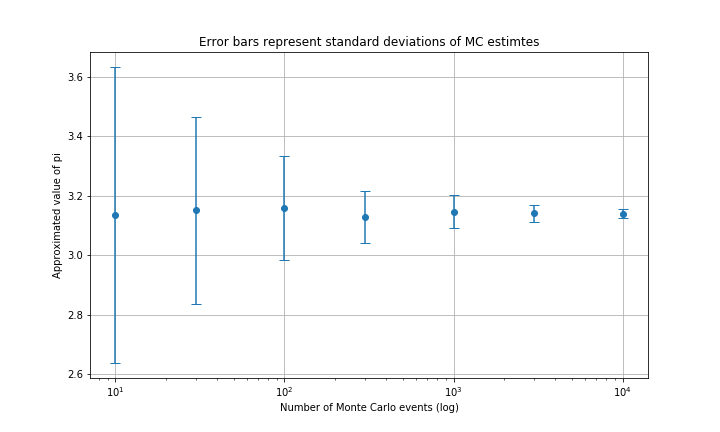

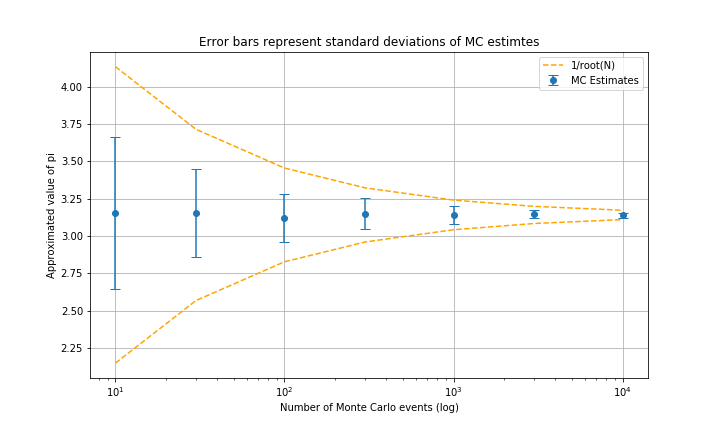

The figures are also viewable at https://i.ibb.co/LN40PQx/mc1.png and https://i.ibb.co/3FyGdpC/mc2.png

### Your solution

In [ ]:
# Our monte_carlo_pi from Reading 15

import numpy as np

def monte_carlo_pi(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    d = x**2 + y**2
    count = np.sum(d <= 1)
    return 4*count/N

In [ ]:
# Your code for accuracy(n_list)



In [ ]:
## Solution 1
def accuracy(n_list):
    import numpy as np
    import matplotlib.pyplot as plt
    
    vals = np.zeros(100)
    means = np.zeros(len(n_list))
    std = np.zeros(len(n_list))
    for i in range(len(n_list)):
        for j in range(100):
            vals[j] = monte_carlo_pi(n_list[i])
        means[i] = vals.mean()
        std[i] = vals.std(ddof=1)
    plt.figure(figsize=(10, 6))
    plt.errorbar(n_list, means, yerr=std, fmt='o', capsize=5)
    plt.xlabel('Number of Monte Carlo events (log)')
    plt.ylabel('Approximated value of pi')
    plt.title('Error bars represent standard deviations of MC estimtes')
    plt.grid(True)
    plt.xscale('log')
    plt.savefig('mc1.png')
    plt.show()
        
accuracy( [10, 30, 100, 300, 1000, 3000, 10000] )
    

In [ ]:
## Solution 2

def accuracy(n_list):
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    vals = np.zeros(100)
    means = np.zeros(len(n_list))
    std = np.zeros(len(n_list))
    upper_bound = np.zeros(len(n_list))
    lower_bound = np.zeros(len(n_list))
    
    for i in range(len(n_list)):
        for j in range(100):
            vals[j] = monte_carlo_pi(n_list[i])
        means[i] = vals.mean()
        std[i] = vals.std(ddof=1)
        upper_bound[i] = np.pi * (1 + 1/np.sqrt(n_list[i]))
        lower_bound[i] = np.pi * (1 - 1/np.sqrt(n_list[i]))

    plt.figure(figsize=(10, 6))
    plt.errorbar(n_list, means, yerr=std, fmt='o', capsize=5, label='MC Estimates')
    plt.plot(n_list, upper_bound, color='orange', linestyle='--', label='1/root(N)')
    plt.plot(n_list, lower_bound, color='orange', linestyle='--')
    plt.xlabel('Number of Monte Carlo events (log)')
    plt.ylabel('Approximated value of pi')
    plt.title('Error bars represent standard deviations of MC estimtes')
    plt.legend()
    plt.grid(True)
    plt.xscale('log')
    plt.savefig('mc2.png')
    plt.show()
    
accuracy( [10, 30, 100, 300, 1000, 3000, 10000] )

## *15.2 Comparing the speeds of array methods and loops using `%timeit`*

Below we show the use of the Jupyter notebook built-in magic command `%timeit` ( https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit ) to see how long it takes our Reading 15 function `monte_carlo_pi()` to execute. 

Specifically we include the following arguments:
* `-n1` and `-r1`: The two arguments combine so that it will call the function only once. By default `%timeit` will run the command you give it several times to determine averages and standard deviations for the times the function takes to run.
* `-o`: Return a `TimeitResult` object that can be stored in a variable to inspect

In [ ]:
# Run me to look at how long it takes to run monte_carlo_pi(1000000)
t1 = %timeit -n1 -r1 -o monte_carlo_pi(1000000)

Make a function that uses a while or for loop to apply the Monte Carlo method to approximate pi. If you are struggling at all to figure it out, ChatGPT is really good at this kind of task. Ask it to "rewrite the following function using a loop" and then copy and paste the `monte_carlo_pi()` function from above into ChatGPT

Assign the time it takes to run this one million times to t2

### Your solution

In [ ]:
def monte_carlo_pi2(N):
    count = N # Temporary assignment so the function works 
    
    # Any code you might want to include before the loop
    
    # Your loop that determines count   
    
    return 4*count/N

# t2 = ..

Finally, let's compare the two methods. The `TimeitResult` object has an attribute `.average` (i.e., `t1.average` and `t2.average`) that allows you to extract the mean from results objects

Perform a calculation that determines the ratio of `t2.average` to `t1.average` and then prints it to indicate how much faster the array methods are for this task than a loop. 

Experiment with some different values of `N` with very different orders of magnitude to determine the impact of the number of operations.

### Your solution

In [ ]:
N = 1000000
t1 = %timeit -n1 -r1 -o monte_carlo_pi(N)
t2 = %timeit -n1 -r1 -o monte_carlo_pi2(N)

# Calculate the ratio of `t2.average` to `t1.average`
# and print it

# print(..)

## *Completing this solo worksheet and submitting it to Canvas*
Before submitting your work, restart + rerun your entire notebook to make sure that everything runs correctly and without error.

To do this:
1. **Restart & Run All:** From the "Kernel" menu to the right of the "Cell" menu, select "Restart & Run All". This will restart the python Kernel, erasing all variables currently stored in memory so that when you "Run All" cells, you can ensure that if you were to run your notebook again on a later day, it would run as intended.
1. Look through the whole notebook and make sure there are no errors. Many questions have purposeful errors in the distributed version so make sure you have fixed them all such that "Restart & Run All" will run through the whole book and successfully print "The notebook ran without errors" at the end. If you have any trouble resolving the errors, please ask one of your classmates or ask us in class or on Piazza.

**Export notebook as HTML:** After you've executed and checked your notebook, choose: File => Save_and_Export_Notebook_As => HTML. This will download an HTML version of your notebook to your computer. This version is can not be executed or modified. You may need to disable any pop-up blockers to allow the file to be downloaded.

**Submit to Canvas:** Submit the html file that you just downloaded to the appropriate Solo Worksheet submission on Canvas.